Project #1 Feature Engineering and Modeling using Python: 

Milestone 1: Data Manipulation
You will process raw data to make it ready for ML model. You will load data from the given csv files and manipulate it to start with feature processing. 

Milestone 2: Feature Modeling
Feature engineering to generate features from the raw data. You will explore data by analyzing missing values and doing target, and non-target analysis. You will also find relevant features by assessing correlation after target vs non-target analysis.


In [1]:
import pandas as pd
# load data files
# load diabetes.csv
diabetes_df = pd.read_csv("..\\model_data\\diabetes.csv")
diabetes_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,Outcome
0,101,58,17,265,24.2,0.614,1017,0
1,108,70,0,0,30.5,0.955,1031,1
2,148,60,27,318,30.9,0.150,1033,1
3,113,76,0,0,33.3,0.278,1035,1
4,83,86,19,0,29.3,0.317,1048,0


In [2]:
# checking record count and columns
diabetes_df.shape

(686, 8)

In [3]:
# data profiling
diabetes_df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T


,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Glucose,686.0,120.651603,31.857707,0.000,85.500,99.00000,117.0000,140.000,166.5000,181.0000,196.0000,199.00
BloodPressure,686.0,69.448980,19.040706,0.000,54.000,64.00000,72.0000,80.000,88.0000,90.0000,106.0000,122.00
SkinThickness,686.0,20.634111,15.944848,0.000,0.000,0.00000,23.0000,32.000,40.0000,44.0000,51.1500,99.00
Insulin,686.0,80.583090,117.712149,0.000,0.000,0.00000,26.0000,127.750,215.0000,303.0000,540.4500,846.00
BMI,686.0,31.974781,7.946174,0.000,23.600,27.30000,32.0000,36.600,41.4000,44.1750,50.3450,67.10
DiabetesPedigreeFunction,686.0,0.469886,0.328851,0.078,0.165,0.24525,0.3705,0.618,0.8765,1.1375,1.6147,2.42
PatientID,686.0,9529.288630,4890.669582,1017.000,2782.000,5189.75000,9446.0000,13685.750,16207.0000,17020.7500,17758.3500,17995.00
Outcome,686.0,0.348397,0.476810,0.000,0.000,0.00000,0.0000,1.000,1.0000,1.0000,1.0000,1.00


In [4]:
# record counts by value of target variable
diabetes_df.Outcome.value_counts()

0    447
1    239
Name: Outcome, dtype: int64

In [5]:
# That's a good one!
len(diabetes_df)

686

In [6]:
# % distribution of target variable
diabetes_df.Outcome.value_counts()*100/len(diabetes_df)

0    65.16035
1    34.83965
Name: Outcome, dtype: float64

In [7]:
# Repeat the same analysis for other two files
# for simplicity, this solution file may not repeat all steps for all three files.
# load patient_data.csv
patient_df = pd.read_csv("..\\model_data\\patient_data.csv")
patient_df.head()

,PatientID,BirthYear,City,State,Country
0,1017,1998,Winona,Minnesota,United States
1,1031,1988,Springfield,Illinois,United States
2,1033,1992,Socorro,Texas,United States
3,1035,1998,Erie,Pennsylvania,United States
4,1048,1987,Sioux Falls,South Dakota,United States


In [8]:
# checking counts
patient_df.shape

# there are more records in this file than diabetes.csv. That means this file has more patients than diabetes.csv. 

(932, 5)

In [27]:
# data profiling
patient_df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
PatientID,932.0,9413.204936,5038.881999,95.0,2277.1,5007.5,9383.5,13829.0,16309.7,17117.0,17733.52,17995.0
BirthYear,932.0,1981.948498,17.457007,1931.0,1955.0,1973.0,1988.0,1996.0,1999.0,2000.0,2000.00,2001.0


In [10]:
# load pregnancies_history.csv
pregnancies_df = pd.read_csv("..\\model_data\\pregnancies_records.csv")
pregnancies_df.head()

,PatientID,PregnancyRecordID
0,1017,7119
1,1017,7120
2,1031,7217
3,1031,7218
4,1031,7219


In [11]:
# checking counts
pregnancies_df.shape

(3060, 2)

In [12]:
# data profiling
pregnancies_df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

# maximum number of pregnancies is 17. Isn't that too high?

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
PatientID,3060.0,10229.397386,4866.164878,1017.0,3053.0,6010.00,10878.5,14307.00,16465.0,17141.20,17726.82,17995.0
PregnancyRecordID,3060.0,71608.722549,34063.248817,7119.0,21372.9,42070.75,76154.5,100154.25,115255.1,119993.15,124087.74,125966.0


In [13]:
# aggregate pregnancies records
pregnancies_summary_df=pregnancies_df.groupby('PatientID', as_index=False).agg({"PregnancyRecordID": "count"})
pregnancies_summary_df.shape
pregnancies_summary_df.columns=['PatientID','Pregnancies']
print(pregnancies_summary_df.columns)

Index(['PatientID', 'Pregnancies'], dtype='object')


In [14]:
# verify few records
pregnancies_summary_df.head

<bound method NDFrame.head of      PatientID  Pregnancies
0         1017            2
1         1031            8
2         1033            4
3         1048            4
4         1074            1
..         ...          ...
670      17877            4
671      17903            1
672      17920            1
673      17963            2
674      17995            2

[675 rows x 2 columns]>

In [15]:
# There are three data files in this live project. 
# diabetes.csv contains useful feature and a target variable- Outcome.
# Other two files have useful features. 
# As diabetes.csv contains target variable, Merging all three files on common key- PatientID using left join
# Using inner join will ignore the records from diabetes.csv if there is no matching record from either pregnancies_records.csv or patient_data.csv
# Hence, left join is a better choice.

merged_df = pd.merge(pd.merge(diabetes_df,patient_df, on="PatientID", how="left"),pregnancies_summary_df, on="PatientID", how="left")
merged_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,Outcome,BirthYear,City,State,Country,Pregnancies
0,101,58,17,265,24.2,0.614,1017,0,1998,Winona,Minnesota,United States,2.0
1,108,70,0,0,30.5,0.955,1031,1,1988,Springfield,Illinois,United States,8.0
2,148,60,27,318,30.9,0.150,1033,1,1992,Socorro,Texas,United States,4.0
3,113,76,0,0,33.3,0.278,1035,1,1998,Erie,Pennsylvania,United States,NaN
4,83,86,19,0,29.3,0.317,1048,0,1987,Sioux Falls,South Dakota,United States,4.0


In [16]:
merged_df.shape

(686, 13)

In [17]:
# BirthYear is not a useful feature. 
# However, we can derive age feature from Birthyear and there may be correlation between age and diabetes.
from datetime import date 
yy = date.today().year
print(yy)
age = yy-merged_df["BirthYear"]
merged_df["Age"]=age
merged_df.head()

2021


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,Outcome,BirthYear,City,State,Country,Pregnancies,Age
0,101,58,17,265,24.2,0.614,1017,0,1998,Winona,Minnesota,United States,2.0,23
1,108,70,0,0,30.5,0.955,1031,1,1988,Springfield,Illinois,United States,8.0,33
2,148,60,27,318,30.9,0.150,1033,1,1992,Socorro,Texas,United States,4.0,29
3,113,76,0,0,33.3,0.278,1035,1,1998,Erie,Pennsylvania,United States,NaN,23
4,83,86,19,0,29.3,0.317,1048,0,1987,Sioux Falls,South Dakota,United States,4.0,34


In [18]:
selected_features = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Pregnancies","Age","Outcome"]
result_df=merged_df[selected_features]

In [19]:
# verify dataframe for missing values
result_df.isnull().sum()

Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Pregnancies                 100
Age                           0
Outcome                       0
dtype: int64

In [20]:
# As per dataset specification--> If patient is not in pregnancies_records.csv, it is safe to assume the patient didn't have any pregnancy
# impute 0 for missing values for Pregnancies
# Alternatively, you can impute missing values as per the distribution of Pregnancies values
result_df["Pregnancies"].fillna(0, inplace=True)
result_df.isnull().sum()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Pregnancies                 0
Age                         0
Outcome                     0
dtype: int64

In [21]:
# visualize data distribution for each feature
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(result_df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(result_df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(result_df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(result_df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(result_df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(result_df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(result_df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(result_df.BMI, bins = 20, ax=ax[3,1]) 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2551:

<AxesSubplot:xlabel='BMI', ylabel='Density'>

In [22]:
# analyze correlation matrix
result_df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Pregnancies,Age,Outcome
Glucose,1.000000,0.151477,0.040823,0.346204,0.197695,0.145761,0.124001,0.280342,0.462198
BloodPressure,0.151477,1.000000,0.202906,0.076375,0.284236,0.035305,0.170870,0.246575,0.067968
SkinThickness,0.040823,0.202906,1.000000,0.440058,0.377623,0.177288,-0.081355,-0.103980,0.056923
Insulin,0.346204,0.076375,0.440058,1.000000,0.202085,0.141636,-0.082711,-0.051447,0.121588
BMI,0.197695,0.284236,0.377623,0.202085,1.000000,0.141266,0.002905,0.037221,0.281862
DiabetesPedigreeFunction,0.145761,0.035305,0.177288,0.141636,0.141266,1.000000,-0.026915,0.042310,0.155810
Pregnancies,0.124001,0.170870,-0.081355,-0.082711,0.002905,-0.026915,1.000000,0.549196,0.227399
Age,0.280342,0.246575,-0.103980,-0.051447,0.037221,0.042310,0.549196,1.000000,0.249978
Outcome,0.462198,0.067968,0.056923,0.121588,0.281862,0.155810,0.227399,0.249978,1.000000


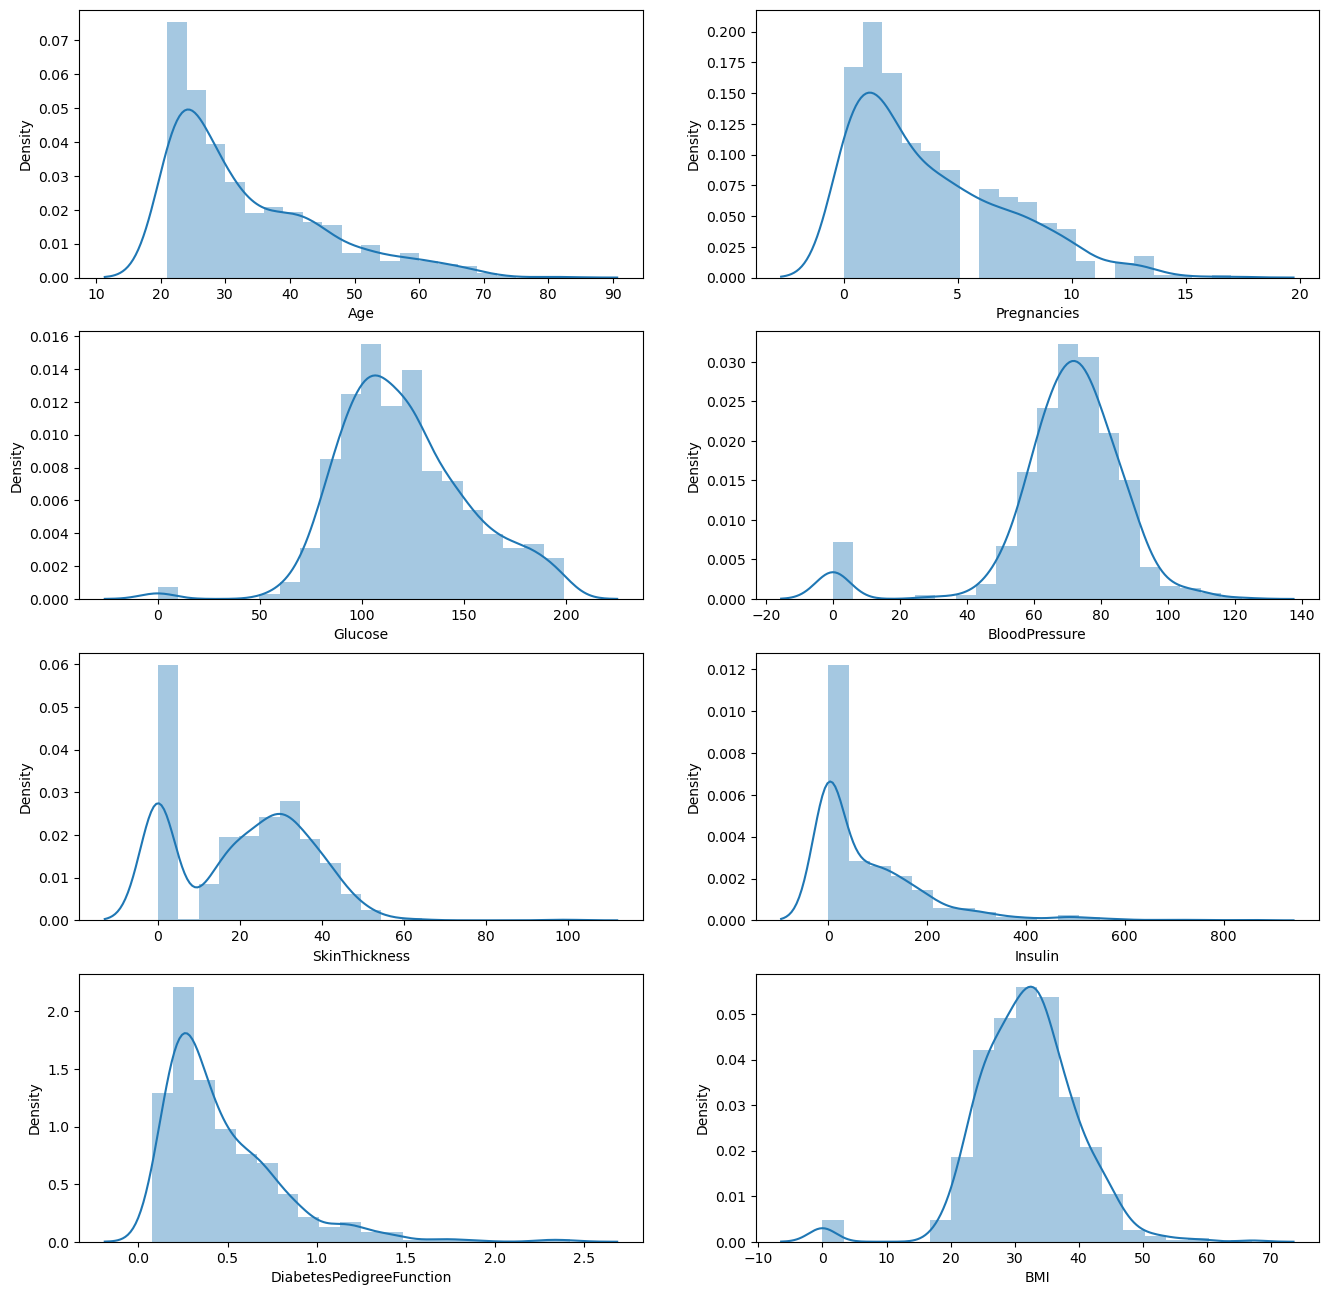

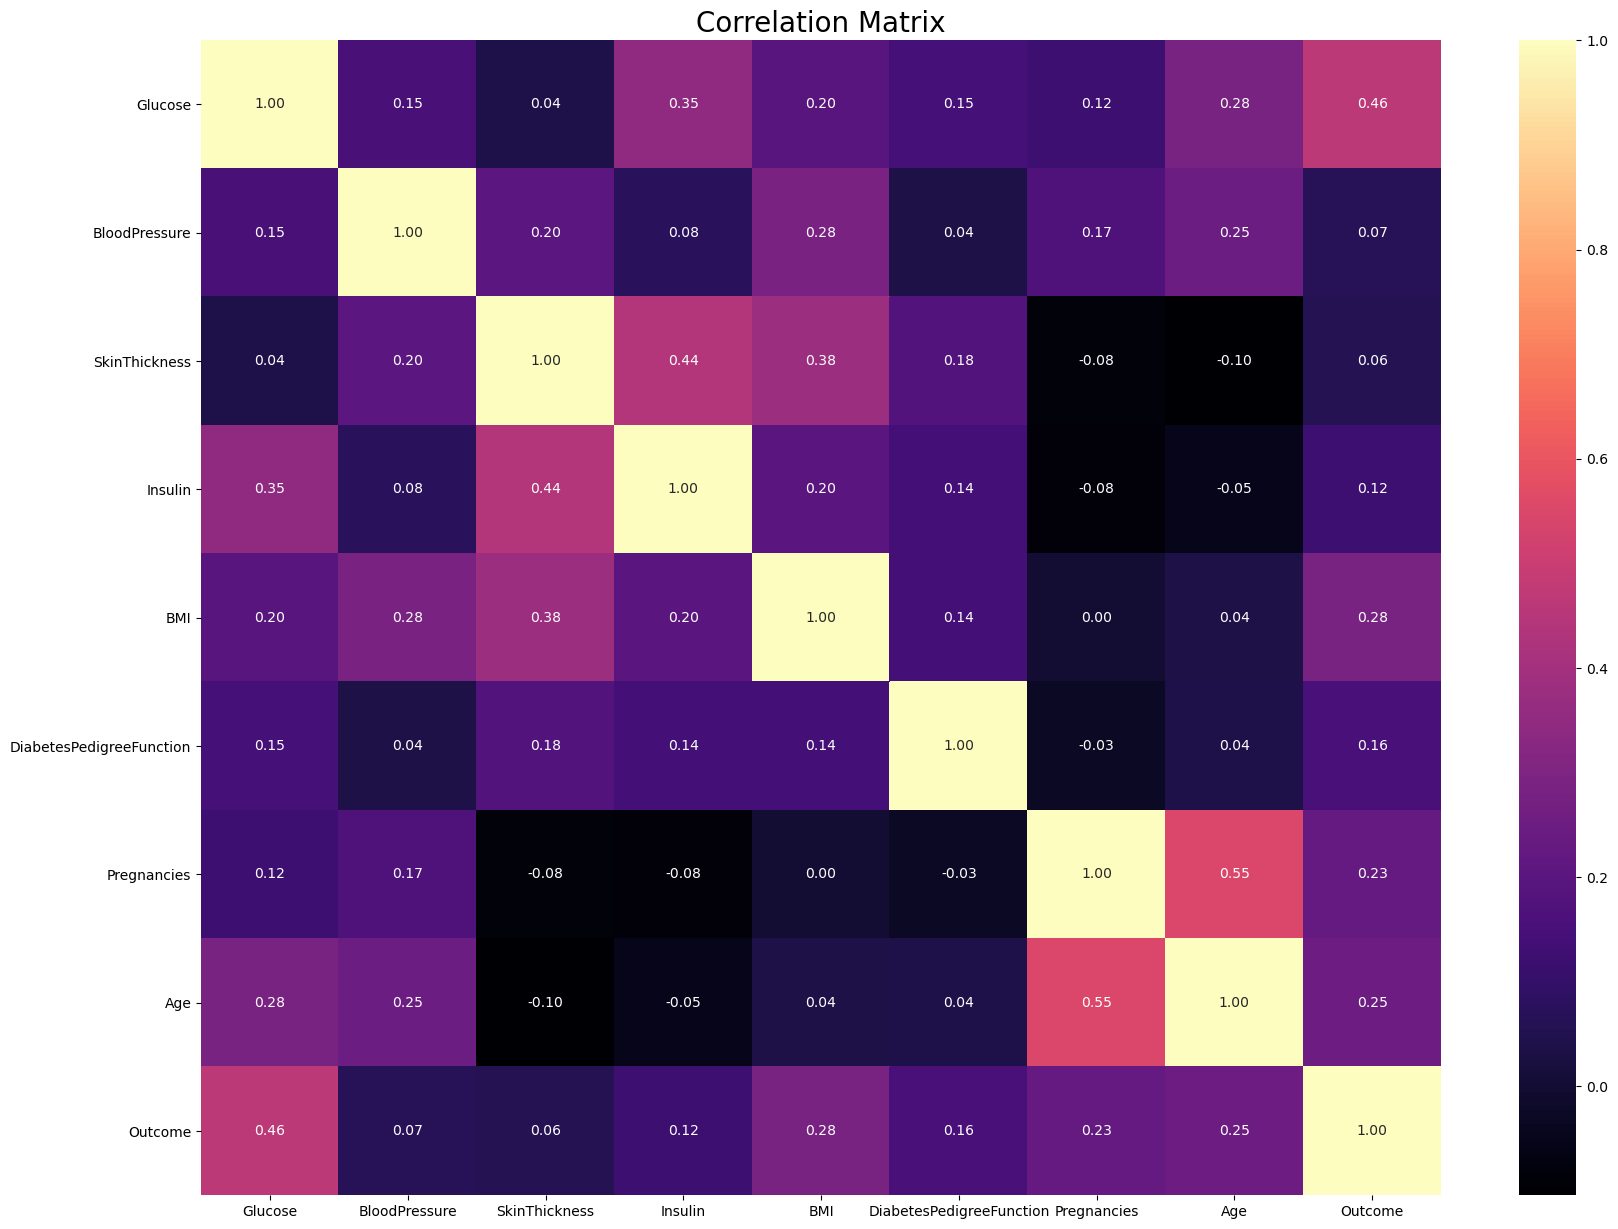

In [23]:
# visualize correlation matrix using heat map
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(result_df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [24]:
# find relevant features by correlation matrix. criteria for relevancy: > 20% correlation 
cor = result_df.corr()
cor_target = abs(cor["Outcome"]) #absolute value
#High Correlations
relevant_features = cor_target[cor_target>=0.2]
relevant_features

Glucose        0.462198
BMI            0.281862
Pregnancies    0.227399
Age            0.249978
Outcome        1.000000
Name: Outcome, dtype: float64

# Solution Ending Notes: 

- Please note that the steps provided in this solution are for reference. 
- It is the bare minimum steps to provide you the glimpse of one way of solving problem. 
- You can go beyond and explore further. 
- As there are three projects in this live project series, it is recommended that you start new solution notebook for Project 2. 
- You can still use the solution from Project 1 and continue. However, the solutions provided here are not continuous. 

In [29]:
result_df.to_csv('result_df.csv', index=False)